模型融合

1. https://www.kaggle.com/filemide/distance-criskiev-hyparam-cont-1-662
2. https://www.kaggle.com/criskiev/distance-is-all-you-need-lb-1-481
3. https://www.kaggle.com/marcelotamashiro/lgb-public-kernels-plus-more-features
4. https://www.kaggle.com/scaomath/no-memory-reduction-workflow-for-each-type-lb-1-28
5. https://www.kaggle.com/fnands/1-mpnn/output?scriptVersionId=18233432
6. https://www.kaggle.com/harshit92/fork-from-kernel-1-481
7. https://www.kaggle.com/xwxw2929/keras-neural-net-and-distance-features
8. https://www.kaggle.com/marcogorelli/criskiev-s-distances-more-estimators-groupkfold?scriptVersionId=18843561
9. https://www.kaggle.com/toshik/schnet-starter-kit

In [1]:
import os
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.stats.mstats import gmean
import seaborn as sns
%matplotlib inline
from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

champs-scalar-coupling
models



In [2]:
sub_path = "../input/models"
all_files = os.listdir(sub_path)
all_files

['submission-1.286.csv',
 'submission-1.701.csv',
 'submission-1.327.csv',
 'submission-1.708.csv',
 'submission-1.302.csv',
 'submission-1.648.csv',
 'submission-1.782.csv',
 'submission-1.710.csv',
 'submission-1.415.csv',
 'submission-1.696.csv',
 'submission-1.662.csv',
 'submission-1.481.csv',
 'submission-1.619.csv',
 'submission-1.643.csv',
 'submission-1.672.csv',
 'submission-1.780.csv',
 'submission-1.714.csv',
 'submission-1.618.csv']

In [3]:
all_files.remove('submission-1.701.csv')
all_files.remove('submission-1.643.csv')
all_files.remove('submission-1.481.csv')
all_files.remove('submission-1.302.csv')
all_files.remove('submission-1.619.csv')
all_files.remove('submission-1.662.csv')
all_files.remove('submission-1.696.csv')
all_files.remove('submission-1.780.csv')
all_files.remove('submission-1.708.csv')
all_files.remove('submission-1.714.csv')

In [4]:
all_files

['submission-1.286.csv',
 'submission-1.327.csv',
 'submission-1.648.csv',
 'submission-1.782.csv',
 'submission-1.710.csv',
 'submission-1.415.csv',
 'submission-1.672.csv',
 'submission-1.618.csv']

In [5]:
import warnings
warnings.filterwarnings("ignore")
outs = [pd.read_csv(os.path.join(sub_path, f), index_col=0) for f in all_files]
concat_sub = pd.concat(outs, axis=1)
cols = list(map(lambda x: "mol" + str(x), range(len(concat_sub.columns))))
concat_sub.columns = cols
concat_sub.reset_index(inplace=True)
concat_sub.head()
ncol = concat_sub.shape[1]

In [6]:
#检查相关性
concat_sub.iloc[:,1:].corr()

,mol0,mol1,mol2,mol3,mol4,mol5,mol6,mol7
mol0,1.000000,0.999881,0.999835,0.999885,0.999882,0.999842,0.999817,0.999850
mol1,0.999881,1.000000,0.999826,0.999876,0.999875,0.999828,0.999812,0.999845
mol2,0.999835,0.999826,1.000000,0.999898,0.999900,0.999828,0.999940,0.999914
mol3,0.999885,0.999876,0.999898,1.000000,0.999959,0.999897,0.999880,0.999922
mol4,0.999882,0.999875,0.999900,0.999959,1.000000,0.999888,0.999881,0.999932
mol5,0.999842,0.999828,0.999828,0.999897,0.999888,1.000000,0.999810,0.999845
mol6,0.999817,0.999812,0.999940,0.999880,0.999881,0.999810,1.000000,0.999896
mol7,0.999850,0.999845,0.999914,0.999922,0.999932,0.999845,0.999896,1.000000


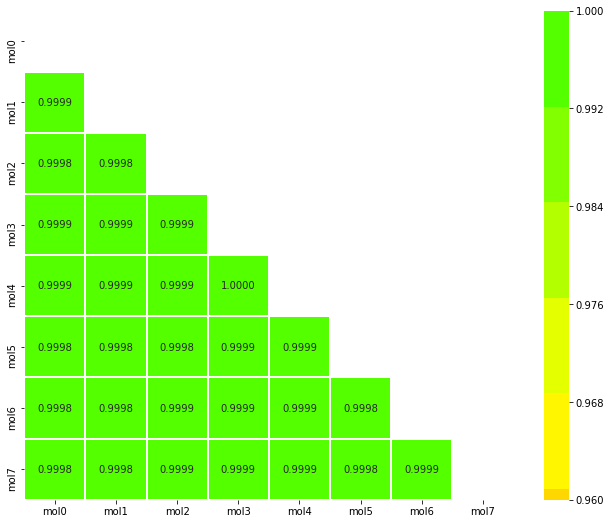

In [7]:
corr = concat_sub.iloc[:,1:].corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


f, ax = plt.subplots(figsize=(11, 9))

#绘制热力图
sns.heatmap(corr, mask=mask, cmap='prism', vmin=0.96, center=0, square=True, linewidths=1, annot=True, fmt='.4f')

In [8]:
concat_sub['m_max'] = concat_sub.iloc[:, 1:].max(axis=1)
concat_sub['m_min'] = concat_sub.iloc[:, 1:].min(axis=1)
concat_sub['m_median'] = concat_sub.iloc[:, 1:].median(axis=1)

In [9]:
concat_sub.describe()

,id,mol0,mol1,mol2,mol3,mol4,mol5,mol6,mol7,m_max,m_min,m_median
count,2.505542e+06,2.505542e+06,2.505542e+06,2.505542e+06,2.505542e+06,2.505542e+06,2.505542e+06,2.505542e+06,2.505542e+06,2.505542e+06,2.505542e+06,2.505542e+06
mean,5.910918e+06,1.583679e+01,1.592437e+01,1.588320e+01,1.588755e+01,1.588637e+01,1.588650e+01,1.588054e+01,1.588590e+01,1.628564e+01,1.548507e+01,1.588360e+01
std,7.232878e+05,3.490001e+01,3.493039e+01,3.485671e+01,3.487233e+01,3.486492e+01,3.486398e+01,3.485870e+01,3.486285e+01,3.507699e+01,3.468347e+01,3.487249e+01
min,4.658147e+06,-3.632142e+01,-2.474941e+01,-3.299384e+01,-3.418129e+01,-3.307354e+01,-3.228784e+01,-3.309956e+01,-3.318558e+01,-2.385103e+01,-3.632142e+01,-3.270920e+01
25%,5.284532e+06,-2.987248e-01,-2.278156e-01,-2.502056e-01,-2.409186e-01,-2.415684e-01,-2.295558e-01,-2.461876e-01,-2.455747e-01,1.274209e-04,-4.880638e-01,-2.385474e-01
50%,5.910918e+06,2.236193e+00,2.290658e+00,2.282187e+00,2.283019e+00,2.283028e+00,2.293922e+00,2.278162e+00,2.282089e+00,2.585781e+00,1.977304e+00,2.276852e+00
75%,6.537303e+06,7.295093e+00,7.355250e+00,7.377225e+00,7.354648e+00,7.350433e+00,7.351437e+00,7.355285e+00,7.357853e+00,7.780592e+00,6.898070e+00,7.343434e+00
max,7.163688e+06,2.041366e+02,2.057290e+02,2.085859e+02,2.031379e+02,2.030828e+02,2.060015e+02,2.844774e+02,2.036310e+02,2.844774e+02,2.024371e+02,2.032492e+02


In [10]:
concat_sub.head(10)

,id,mol0,mol1,mol2,mol3,mol4,mol5,mol6,mol7,m_max,m_min,m_median
0,4658147,20.144223,55.943756,5.418903,15.929076,17.896688,16.333971,16.752722,20.500710,55.943756,5.418903,17.324705
1,4658148,181.403123,185.007780,102.854691,201.214020,152.958954,197.289728,129.551773,151.843719,201.214020,102.854691,167.181038
2,4658149,3.577224,1.717238,5.910957,13.849666,10.104980,6.159606,5.626666,9.891783,13.849666,1.717238,6.035282
3,4658150,181.403123,185.007780,102.854691,201.214020,150.669815,196.833797,129.551773,151.843719,201.214020,102.854691,166.623421
4,4658151,20.144230,55.943756,5.418903,17.064312,18.489357,17.863188,16.752722,20.500710,55.943756,5.418903,18.176272
5,4658152,90.869733,92.056030,83.566948,90.308708,91.235405,90.829111,82.277916,92.437202,92.437202,82.277916,90.849422
6,4658153,2.321565,2.406619,2.133362,2.688423,3.183611,2.197705,1.578010,2.753030,3.183611,1.578010,2.364092
7,4658154,-7.428432,-7.956534,-9.036317,-7.543731,-7.594494,-7.827742,-9.356209,-7.472149,-7.428432,-9.356209,-7.711118
8,4658155,-9.907978,-9.950280,-10.134884,-9.638301,-9.611823,-9.426288,-9.920478,-9.576653,-9.426288,-10.134884,-9.773139
9,4658156,90.843607,92.062430,83.571823,90.198280,91.430664,91.480874,82.279091,92.451614,92.451614,82.279091,91.137136


In [11]:
cutoff_lo = 0.8
cutoff_hi = 0.2

In [12]:
concat_sub['scalar_coupling_constant'] = concat_sub['m_median']
concat_sub[['id', 'scalar_coupling_constant']].to_csv('stack_median.csv', 
                                        index=False, float_format='%.6f')